In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import animation, rc
from IPython.display import HTML

# Taken from https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)

class SolutionPath:
    def __init__(self, fname):
        print(fname)
        data = np.genfromtxt(fname, delimiter=" ")
        self.pos = data[:, 0:3]
        self.rot = data[:, 3:8]

## Defining the Environment

In [2]:
obs_pos = [(5,0,0)]
obs_size = [(5,5,5)]

## Loading in the Solution Trajectory

In [3]:
p = SolutionPath("../solution.txt")

../solution.txt


## Ploting the Solution Trajectory

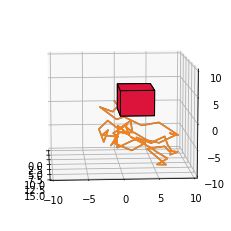

In [8]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
pc = plotCubeAt2(obs_pos, obs_size, color = "crimson", edgecolor = "k")
ax.add_collection3d(pc)
ax.set_xlim(0, 15)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
# ax.set_xlabel('X Position')
# ax.set_ylabel('Y Position')
# ax.set_zlabel('Z Position')
# ax.plot3D(p.pos[:, 0], p.pos[:, 1], p.pos[:, 2])

def init():
    # Plot the surface.
    ax.plot3D(p.pos[:, 0], p.pos[:, 1], p.pos[:, 2])
    return fig,


def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=50, blit=True)
fn = 'test'
# # ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
ani.save(fn+'.gif',writer='pillow',fps=1000/50)
# plt.rcParams['animation.html'] = 'html5'
# ani


In [5]:
HTML(ani.to_html5_video())

In [6]:
rc('animation', html='html5')

In [7]:
ani